In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras.utils as ks_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


2022-12-07 22:49:59.328438: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 22:49:59.877824: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-07 22:49:59.877838: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-07 22:50:00.781184: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

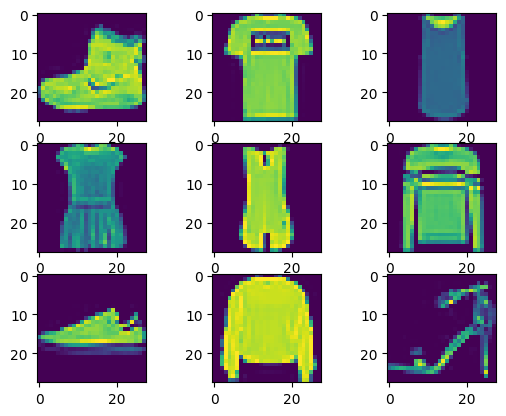

In [3]:
for i in range(9):
 plt.subplot(331 + i)
 plt.imshow(x_train[i])

plt.show()


In [4]:
# Shuffle them, for better accuracy
indexes = np.arange(x_test.shape[0])
for _ in range(5):
    indexes = np.random.permutation(indexes)

X_test = x_test[indexes]
y_test = y_test[indexes]

In [5]:
# Scale Images to between 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
y_train = ks_utils.to_categorical(y_train,10)
y_test = ks_utils.to_categorical(y_test,10)

In [7]:
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential



In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='Adam',
                  loss='categorical_crossentropy',
                  metrics=['Accuracy'])

callback_list=[EarlyStopping(monitor='val_loss', patience=20)]

model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=20,verbose=1,callbacks=callback_list)

2022-12-07 22:50:02.863057: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-07 22:50:02.863305: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-07 22:50:02.863325: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Maskin): /proc/driver/nvidia/version does not exist
2022-12-07 22:50:02.863955: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
469/469 [==============================] - 21s 43ms/step - loss: 0.4230 - Accuracy: 0.8477 - val_loss: 4.0052 - val_Accuracy: 0.1003
Epoch 2/20
469/469 [==============================] - 20s 43ms/step - loss: 0.2760 - Accuracy: 0.8995 - val_loss: 9.5834 - val_Accuracy: 0.1009
Epoch 3/20
469/469 [==============================] - 20s 42ms/step - loss: 0.2384 - Accuracy: 0.9116 - val_loss: 10.2102 - val_Accuracy: 0.0997
Epoch 4/20
469/469 [==============================] - 20s 43ms/step - loss: 0.2121 - Accuracy: 0.9211 - val_loss: 13.1127 - val_Accuracy: 0.1006
Epoch 5/20
469/469 [==============================] - 20s 43ms/step - loss: 0.1967 - Accuracy: 0.9273 - val_loss: 12.8243 - val_Accuracy: 0.1015
Epoch 6/20
469/469 [==============================] - 20s 43ms/step - loss: 0.1799 - Accuracy: 0.9326 - val_loss: 12.9912 - val_Accuracy: 0.1000
Epoch 7/20
469/469 [==============================] - 20s 43ms/step - loss: 0.1684 - Accuracy: 0.9362 - val_loss: 13.6313 - val_Accu

In [11]:
loss, acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 53.6861 - Accuracy: 0.8405


In [12]:
print(f'Test data: acc {acc}')

Test data: acc 0.840499997138977


# Describing my model

To start, I'm using 3 Convolutional layers with conv2D since our data is 2D.

After the first ConvLayer - I'm using batchNormalization / this is to normalize our output from the first layer.

I'm Also using dropout, this is to take data out from the model, to prevent overfitting.

I'm Also using Flatten, to add an extra channel dimention.

At the end, Im moving the data through 2 dense layers / where the last layer is output - one output node for each of our categories.
